In [1]:
import cv2
import numpy as np
from genericpath import isdir
import os

In [2]:
def create_frames(path):
    frame_counter = 0
    capture = cv2.VideoCapture(path)
    name = path.split("/")[-1]
    directory = f'./images/{name}'
    if not os.path.isdir(directory):
        os.makedirs(directory)
    while True:
        success, frame = capture.read()
        if success:
            # Deleting low resolution frame
            if np.mean(frame) < 10:
                print("Removed the frame")
                continue
            if frame_counter % 5 == 0:
                cv2.imwrite(f'./images/{name}/frame_{frame_counter}.jpg', frame)
        else:
            break
        frame_counter += 1
    print(f'There are {frame_counter} frames in this video')
    capture.release()
    return

In [3]:
create_frames("./videos/VID-20221003-WA0018.mp4")

There are 310 frames in this video


In [4]:
def enhance_powerlaw(path, gamma):
    image = cv2.imread(path)
    normalized_image = image / 255.0
    result = cv2.pow(normalized_image, gamma)
    cv2.imshow('Original image ',image)
    cv2.imshow('After applying powerlaw', result)
    cv2.waitKey(0)
    return

In [5]:
import scipy.misc
from scipy import misc
from PIL import Image
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt

def enhance_inverse(path):
    image = Image.open(path)
    image_array = np.asarray(image)
    image_inverse = 255 - image_array
    result = Image.fromarray(image_inverse)
    imshow(result)
    return

In [ ]:
enhance_powerlaw("./images/VID-20221003-WA0018.mp4/frame_100.jpg", 1.6)

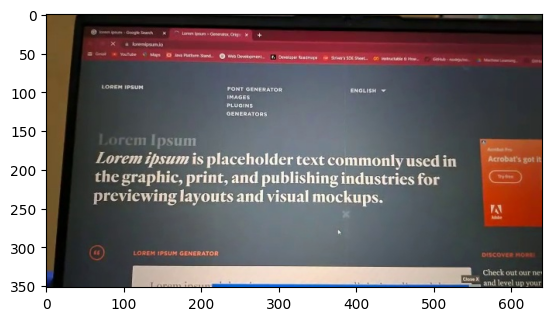

In [7]:
from PIL import Image
from matplotlib.pyplot import imshow

image = Image.open("./images/VID-20221003-WA0018.mp4/frame_100.jpg")
imshow(image)

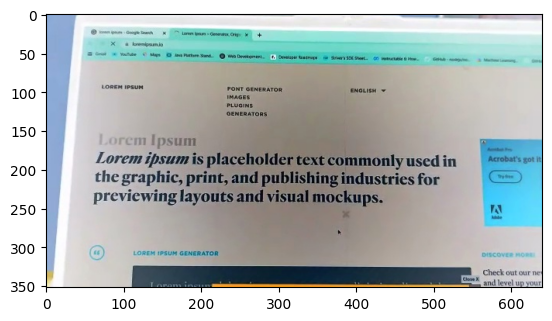

In [8]:
img = "./images/VID-20221003-WA0018.mp4/frame_100.jpg"
enhance_inverse(img)